<div align="center"> <h1>RappiPay Challenge Fraud Detection EDA & Customer Segmentation</h1> </div>

Napoleon Leal 

Contents:

1. Introduction
2. Exploratory Data Analysis
  - Feature Analysis
  - Data Cleaning
  - Descriptive Statistics
  - Correlation
3. Customer Segmentation
4. Conclusion

## 1. Introduction

The aim of this study is to analyze the given data, make conclusions, prepate it for a supervised learning neural network model to classify user based on the variables given in this dataset to predict a credit card default.

### 1.1 Environment
The analysis has been fully made in Python and their respective popular libraries for data analysis (numpy, pandas, matplotlib, seaborn, imblearn), furthermore in the model building step i use machine learning frameworks (scikit-learn, tensorflow with keras)



## 2. Exploratory Data Analysis (EDA)

#### Feature Analysis

In [29]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings   
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib as mpl

In [31]:
# Get the data
rappi_df = pd.read_csv('/content/ds_challenge_data_2022.csv', encoding='utf-16')
rappi_df.head()

,transaction_id,user_id,género,linea_tc,interes_tc,monto,fecha,hora,dispositivo,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude
0,1,573,M,87000,56,581.03,02/01/20,0,"{'año': 2019, 'marca': 'Apple', 'proveedor': '...",Farmacia,Ciudad de México,Aceptada,False,0.0,17.43,False
1,2,737,F,34000,51,421.73,02/01/20,0,"{'año': 2021, 'marca': 'Huawei', 'proveedor': ...",Tienda departamental,Cancún,Aceptada,False,0.0,12.65,False
2,3,887,F,52000,38,399.55,02/01/20,0,"{'año': 2017, 'marca': 'Apple', 'proveedor': '...",Farmacia,Tijuana,En proceso,False,0.0,11.99,False
3,4,1304,M,67000,60,828.01,02/01/20,0,"{'año': 2019, 'marca': 'Samsung', 'proveedor':...",Tienda departamental,Ciudad de México,En proceso,False,0.0,24.84,False
4,5,1361,F,28000,52,886.04,02/01/20,0,"{'año': 2021, 'marca': 'Samsung', 'proveedor':...",Supermercado,Cancún,Aceptada,False,0.0,26.58,False


In [33]:
rappi_df

,transaction_id,user_id,género,linea_tc,interes_tc,monto,fecha,hora,dispositivo,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude
0,1,573,M,87000,56,581.03,02/01/20,0,"{'año': 2019, 'marca': 'Apple', 'proveedor': '...",Farmacia,Ciudad de México,Aceptada,False,0.00,17.43,False
1,2,737,F,34000,51,421.73,02/01/20,0,"{'año': 2021, 'marca': 'Huawei', 'proveedor': ...",Tienda departamental,Cancún,Aceptada,False,0.00,12.65,False
2,3,887,F,52000,38,399.55,02/01/20,0,"{'año': 2017, 'marca': 'Apple', 'proveedor': '...",Farmacia,Tijuana,En proceso,False,0.00,11.99,False
3,4,1304,M,67000,60,828.01,02/01/20,0,"{'año': 2019, 'marca': 'Samsung', 'proveedor':...",Tienda departamental,Ciudad de México,En proceso,False,0.00,24.84,False
4,5,1361,F,28000,52,886.04,02/01/20,0,"{'año': 2021, 'marca': 'Samsung', 'proveedor':...",Supermercado,Cancún,Aceptada,False,0.00,26.58,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647,13648,1853,F,57000,46,736.20,16/01/20,17,"{'año': 2015, 'marca': 'Motorola', 'proveedor'...",Compra en línea,Guadalajara,Aceptada,True,36.81,22.09,False
13648,13649,1914,F,57000,52,251.05,16/01/20,17,"{'año': 2020, 'marca': 'Samsung', 'proveedor':...",Supermercado,Cancún,Rechazada,False,0.00,7.53,False
13649,13650,1939,M,43000,33,634.86,16/01/20,17,"{'año': 2015, 'marca': 'Samsung', 'proveedor':...",NaN,Monterrey,Aceptada,False,31.74,19.05,False
13650,13651,1975,F,40000,54,362.82,16/01/20,17,"{'año': 2014, 'marca': 'Samsung', 'proveedor':...",Farmacia,Monterrey,Aceptada,False,0.00,10.88,False


In [34]:
rappi_df.fraude.sum()

406

The main aim of the data is to identify clients that are predicted to credit card default based on the current data, according to the fraude column which is set to “False” for non-defaulters and “True” for defaulters. Thus, it is a binary classification problem on a relatively unbalanced dataset, as shown in the following figure.

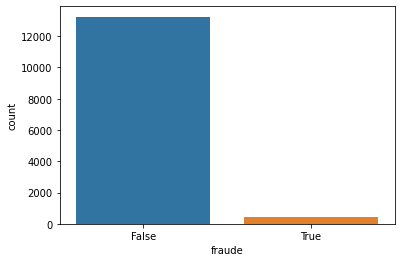

In [35]:
sns.countplot(x='fraude', data=rappi_df)

As can be seen, a number of 810 out of 26,975 (or 3.09%) of transactions are fraudulent (i.e. has category True). The data is highly unbalanced

In [36]:
fraud = rappi_df[rappi_df['fraude'] == 1]
valid = rappi_df[rappi_df['fraude'] == 0]
fraud_ratio = len(fraud) / len(valid) * 100
print(f'{np.round(fraud_ratio,3)}%')
print(f'Fraud Transactions: {len(fraud)}')
print(f'Valid Transactions: {len(valid)}')

3.065%
Fraud Transactions: 406
Valid Transactions: 13245


In [37]:
rappi_df.shape

(13652, 16)

In [38]:
rappi_df.describe()

,transaction_id,user_id,linea_tc,interes_tc,monto,hora,dcto,cashback
count,13652.000000,13652.000000,13652.000000,13652.000000,13652.000000,13652.000000,13651.000000,13651.000000
mean,6826.500000,2005.473777,62488.353355,48.291972,514.035753,12.492455,5.474570,16.974984
std,3941.137272,1144.721661,21847.586989,9.581761,292.623843,5.638463,12.455808,11.066168
min,1.000000,0.000000,25000.000000,32.000000,1.000000,0.000000,0.000000,0.030000
25%,3413.750000,1040.000000,44000.000000,40.000000,298.467500,9.000000,0.000000,9.450000
50%,6826.500000,2006.000000,63000.000000,49.000000,504.620000,13.000000,0.000000,15.910000
75%,10239.250000,2974.000000,82000.000000,57.000000,719.895000,17.000000,0.000000,22.950000
max,13652.000000,3999.000000,99000.000000,64.000000,1712.700000,23.000000,85.640000,109.730000


In [39]:
rappi_df.fecha.unique()

array(['02/01/20', '03/01/20', '04/01/20', '05/01/20', '06/01/20',
       '07/01/20', '08/01/20', '09/01/20', '10/01/20', '11/01/20',
       '12/01/20', '13/01/20', '14/01/20', '15/01/20', '16/01/20'],
      dtype=object)

In [40]:
rappi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13652 entries, 0 to 13651
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transaction_id   13652 non-null  int64  
 1   user_id          13652 non-null  int64  
 2   género           13652 non-null  object 
 3   linea_tc         13652 non-null  int64  
 4   interes_tc       13652 non-null  int64  
 5   monto            13652 non-null  float64
 6   fecha            13652 non-null  object 
 7   hora             13652 non-null  int64  
 8   dispositivo      13652 non-null  object 
 9   establecimiento  12156 non-null  object 
 10  ciudad           13478 non-null  object 
 11  status_txn       13652 non-null  object 
 12  is_prime         13652 non-null  bool   
 13  dcto             13651 non-null  float64
 14  cashback         13651 non-null  float64
 15  fraude           13651 non-null  object 
dtypes: bool(1), float64(3), int64(5), object(7)
memory usage: 

In [41]:
rappi_df.interes_tc.min()

32

The dataset used in this study consists of **26,975 observations** that represent distinct credit card transactions. Each observation has **16 attributes** that contain information on the transaction, demographic factors, credit data, of rappi credit card clients from various cities of Mexico from January 2nd 2020 to January 30th 2020.

The information about the variables are:

1. `transaction_id`: ID of each transaction, categorical variable
2. `user_id`: ID of each client of the rappi credit card
3. `género`: Gender, categorical variable (F=Female, M=Male, =)
4. `linea_tc`: Amount of given credit on the card on MXN Pesos
5. `interes_tc`: interest of the user credit card
6. `monto`: Amount spend in that transaction MXN Pesos
7. `fecha`: date of the transaction
8. `hora`: hour of the day of the transaction
9. `dispositivo`: dictionary type object that contains
  - Year of release of the mobile
  - Brand of the mobile device of the user
  - Cellphone provider of the device
10. `establecimiento`: Type of store where the transaction takes place
11. `ciudad`: city of Mexico where the tx takes place
12. `status_txn`: status of the transaction (approved, declined, on hold)
13. `is_prime`: boolean value determining whether the customer belongs to the rappi prime program 
14. `dcto`: percentage of discount on the original amount of the transaction
15. `cashback`: amount in MXN Pesos of cashback rappi gave to the user for that transaction

The last variable is the one to be predicted
16. `fraude`: indicates if the credit card user committed fraud on that transaction


In [42]:
for i in rappi_df.columns:
  print(i)
  if len(rappi_df[i].unique()) < 10:
    print(f'Unique values of column {i}: {rappi_df[i].unique()}')
  if rappi_df[i].dtype != 'object':
    print(f'Min value of column {i}: {rappi_df[i].min()}')
    print(f'Max value of column {i}: {rappi_df[i].max()}')
  print('')

transaction_id
Min value of column transaction_id: 1
Max value of column transaction_id: 13652

user_id
Min value of column user_id: 0
Max value of column user_id: 3999

género
Unique values of column género: ['M' 'F' 'N']

linea_tc
Min value of column linea_tc: 25000
Max value of column linea_tc: 99000

interes_tc
Min value of column interes_tc: 32
Max value of column interes_tc: 64

monto
Min value of column monto: 1.0
Max value of column monto: 1712.7

fecha

hora
Min value of column hora: 0
Max value of column hora: 23

dispositivo

establecimiento
Unique values of column establecimiento: ['Farmacia' 'Tienda departamental' 'Supermercado' nan 'Abarrotes'
 'Compra en línea']

ciudad
Unique values of column ciudad: ['Ciudad de México' 'Cancún' 'Tijuana' 'Monterrey' 'Toluca' 'Guadalajara'
 'Nezahualcóyotl' nan]

status_txn
Unique values of column status_txn: ['Aceptada' 'En proceso' 'Rechazada']

is_prime
Unique values of column is_prime: [False  True]
Min value of column is_prime: Fal

In [48]:
# Making a copy of the original dataframe so it can be manipulated
device_values = rappi_df['dispositivo'].str.replace("'", '"').apply(json.loads).tolist()
df_device = pd.DataFrame(device_values)

df = pd.concat([rappi_df, df_device], axis=1)
df = df.drop('dispositivo', axis=1)
df = df.rename(columns={'género': 'genero', 'año': 'anio'})
df.head()

,transaction_id,user_id,genero,linea_tc,interes_tc,monto,fecha,hora,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude,anio,marca,proveedor
0,1,573,M,87000,56,581.03,02/01/20,0,Farmacia,Ciudad de México,Aceptada,False,0.0,17.43,False,2019,Apple,Telcel
1,2,737,F,34000,51,421.73,02/01/20,0,Tienda departamental,Cancún,Aceptada,False,0.0,12.65,False,2021,Huawei,ATT
2,3,887,F,52000,38,399.55,02/01/20,0,Farmacia,Tijuana,En proceso,False,0.0,11.99,False,2017,Apple,ATT
3,4,1304,M,67000,60,828.01,02/01/20,0,Tienda departamental,Ciudad de México,En proceso,False,0.0,24.84,False,2019,Samsung,ATT
4,5,1361,F,28000,52,886.04,02/01/20,0,Supermercado,Cancún,Aceptada,False,0.0,26.58,False,2021,Samsung,Telcel


In [50]:
df2 = pd.concat(
    [
        df[df["fraude"] == 0].sample(250, random_state=0),
        df[df["fraude"] == 1].sample(250, random_state=0),
    ]
)

fig = px.histogram(
    df2,
    title="Transaction count for different amounts",
    x="monto",
    color="fraude",
    marginal="box",
)
fig.update_traces(opacity=0.75)
fig.update_layout(barmode="overlay")
fig.show()

#### Dealing with null values

In [10]:
df.isnull().sum()

transaction_id        0
user_id               0
genero                0
linea_tc              0
interes_tc            0
monto                 0
fecha                 0
hora                  0
establecimiento    2939
ciudad              334
status_txn            0
is_prime              0
dcto                  0
cashback              0
fraude                0
anio                  0
marca                 0
proveedor             0
dtype: int64

We can see we have 2,939 null values in establecimiento variable and 334 null values in ciudad variable. 

**Around 10.89% of all the datapoints have null values in establecimiento, and around 1.23% of all datapoints have null values in city**

In [ ]:
len(df[(df['establecimiento'].isnull()) & (df['fraude']==1)])

53

In [ ]:
len(df[(df['ciudad'].isnull()) & (df['fraude']==1)])

6

Out of the 2,939 datapoints that have establecimiento variable null, only 53 of the transactions are fraudulent, as well as of the 334 entries that have city as null value only 6 transactions are fraudulent, a mere 1.80% and 1.79% respectively.
I made the decision to eliminate the entries with city with null values due to their small size however I do not consider that I can do the same with the entries that have establishment with null values as they are too much data, about 11% of the total data. So i replace the null values with a new category called 'unknown'.

In [ ]:
df = df[df['ciudad'].notna()]

In [ ]:
df = df.fillna('Unknown')

In [ ]:
df.isnull().sum()

transaction_id     0
user_id            0
genero             0
linea_tc           0
interes_tc         0
monto              0
fecha              0
hora               0
establecimiento    0
ciudad             0
status_txn         0
is_prime           0
dcto               0
cashback           0
fraude             0
anio               0
marca              0
proveedor          0
dtype: int64

#### Descriptive Statistics

In [ ]:
fraud = df[df['fraude'] == 1]
valid = df[df['fraude'] == 0]
fraud_ratio = len(fraud) / len(valid) * 100
print(f'{np.round(fraud_ratio,2)}%')
print(f'Fraud Transactions: {len(fraud)}')
print(f'Valid Transactions: {len(valid)}')

3.11%
Fraud Transactions: 804
Valid Transactions: 25837


In [ ]:
print('Amount details of the fraudulent transactions')
fraud['monto'].describe()

Amount details of the fraudulent transactions


count     804.000000
mean      580.712649
std       318.876454
min         1.000000
25%       341.125000
50%       576.825000
75%       795.412500
max      1625.160000
Name: monto, dtype: float64

In [ ]:
print('Amount details of the valid transactions')
valid['monto'].describe()

Amount details of the valid transactions


count    25837.000000
mean       511.967498
std        289.339520
min          1.000000
25%        299.290000
50%        504.380000
75%        714.190000
max       1712.700000
Name: monto, dtype: float64

I created another dataframe with only the fraudulent transactions

In [ ]:
df_fraude = rappi_df.loc[rappi_df["fraude"]==1]

In [ ]:
df_fraude['status_txn'].value_counts()

Aceptada      570
En proceso    162
Rechazada      78
Name: status_txn, dtype: int64

Only `9.62%` of the fraudulent transactions were denied 

In [ ]:
# Top 10 user with more fraudulent transactions
df_fraude[df_fraude.duplicated('user_id')]['user_id'].value_counts()[:10]

1395    3
1872    3
1928    3
3913    3
2402    2
2608    2
1671    2
1490    2
3434    2
821     2
Name: user_id, dtype: int64

In [ ]:
df_fraude[df_fraude['user_id']==1395]

,transaction_id,user_id,género,linea_tc,interes_tc,monto,fecha,hora,dispositivo,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude
2983,2984,1395,M,98000,34,843.40,05/01/20,9,"{'año': 2014, 'marca': 'Samsung', 'proveedor':...",Farmacia,Monterrey,Aceptada,True,0.0,25.30,True
7911,7912,1395,M,98000,34,75.24,10/01/20,14,"{'año': 2018, 'marca': 'Apple', 'proveedor': '...",Farmacia,Monterrey,Aceptada,True,0.0,5.27,True
18671,18672,1395,M,98000,34,717.44,22/01/20,6,"{'año': 2018, 'marca': 'Apple', 'proveedor': '...",Compra en línea,Monterrey,En proceso,True,0.0,21.52,True
21415,21416,1395,M,98000,34,256.22,25/01/20,5,"{'año': 2018, 'marca': 'Apple', 'proveedor': '...",Farmacia,Monterrey,Aceptada,True,0.0,7.69,True


There are 4 users that have made 4 fraudulent transactions

In [ ]:
rappi_df.user_id.nunique()

4000

In [ ]:
df_fraude.user_id.nunique()

675

There are a total of 4,000 users that make the whole 26,975 transactions, of which 675 user have at least one fraudulent transaction. `16.87%` of the users have at least one fraudulent transaction. 

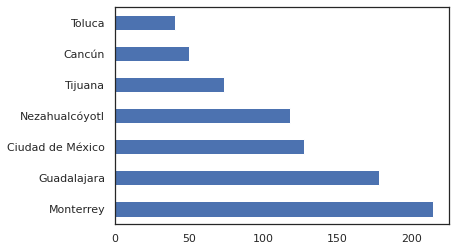

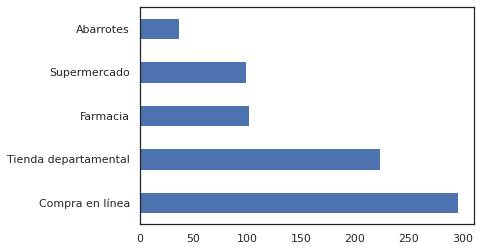

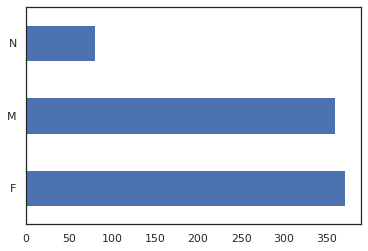

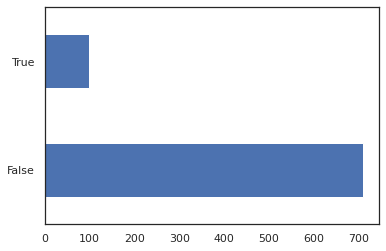

In [ ]:
cols = ['ciudad', 'establecimiento', 'género', 'is_prime']
for i in cols:
  df_fraude[i].value_counts().plot(kind='barh')
  plt.show()#, df_fraude[i].value_counts()
  print('\n')

- We can see that monterrey is the place where most fraudulent transactions have been made, followed closely by guadalajara.

- Online purchases are the most frequent type of purchase.

- Gender does not seem to influence fraudulent transactions.

- Interestingly, there is a small but unexpected amount of fraudulent transactions in which the user is a member of rappi prime.


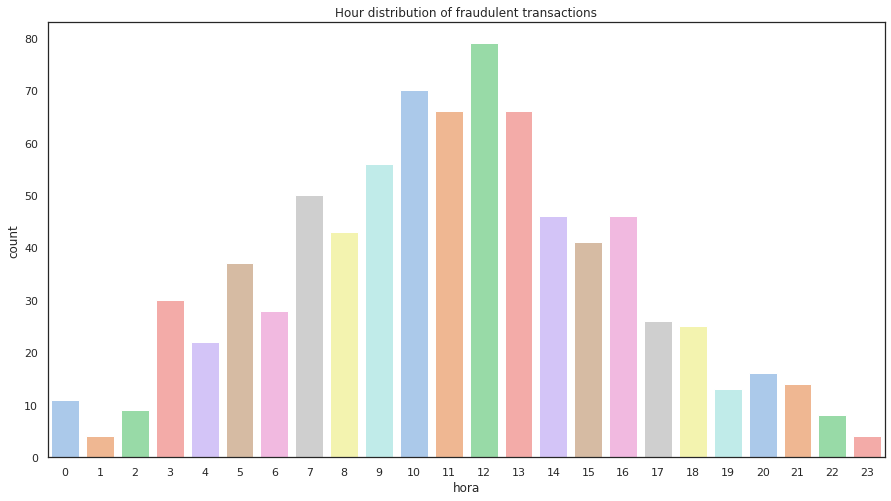

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='hora',data=df_fraude, palette = 'pastel')
plt.title("Hour distribution of fraudulent transactions")
plt.show()

We can observe that the time when most fraudulent transactions are committed is around noon.

#### Correlation

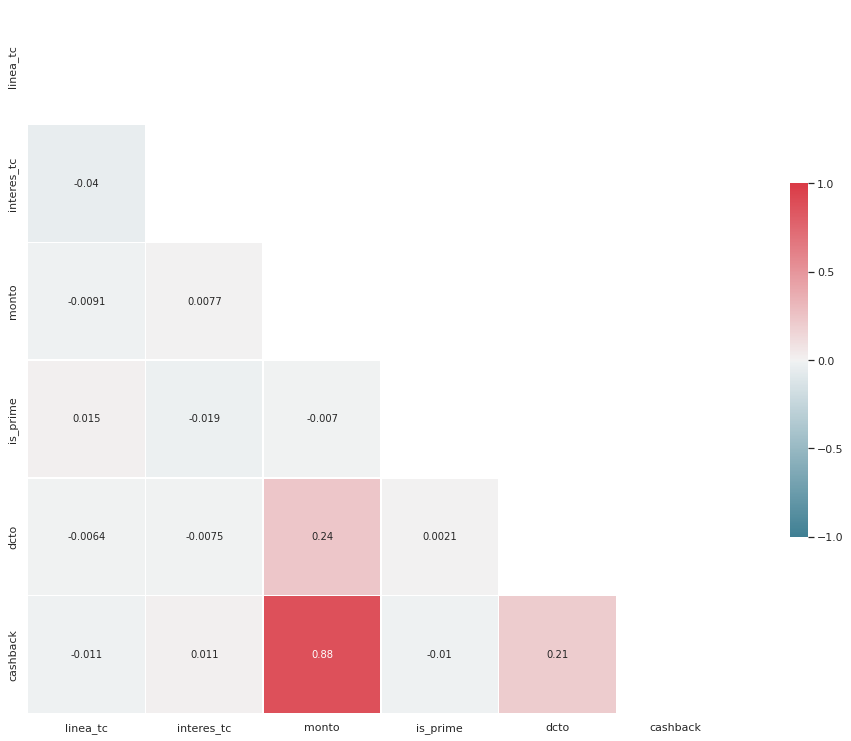

In [ ]:
# Correlation matrix
sns.set(style="white", font_scale=1)
numeric = ['linea_tc','interes_tc','monto','is_prime','dcto','cashback']
corr = df[numeric].corr() # .corr is used to find corelation

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])

We can see that there is no strong correlation in the variables except for cashback and amount, which makes sense considering that the cashback percentage is fixed and the more you spend the more cashback you get.

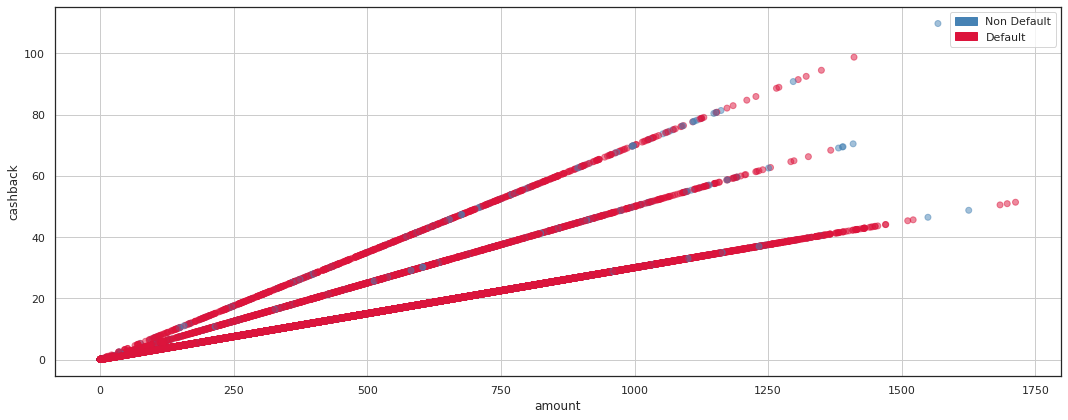

In [ ]:
import matplotlib.patches as mpatches
import matplotlib

data_np=df.to_numpy()
target=df.fraude

# variables to 
cashback = df['cashback'].to_numpy()
amount = df['monto'].to_numpy()


fig, ax = plt.subplots(figsize= (15,6))

labels=["Non Default","Default"]
pop_a = mpatches.Patch(color='steelblue', label='Non Default')
pop_b = mpatches.Patch(color='crimson', label='Default')
colors=['crimson', 'steelblue']

ax.scatter(amount, cashback, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels, alpha=0.5)
ax.grid()
ax.set_xlabel('amount')
ax.set_ylabel('cashback')
ax.legend(handles= [pop_a,pop_b])

plt.tight_layout()
plt.show()

The above linear relationship of the amount and cashback variables is confirmed, the cashback variable will be discarded in the NN model.


In [ ]:
from google.colab import files

df.to_csv('rappi_challenge_clean.csv')
files.download('rappi_challenge_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>